# Coursework 2

## Machine Learning for Biomedical Applications (level 6)

### Deadline: Monday 28th October 2024, 4pm
### Submission format
Solve all the questions directly in this notebook. Tasks require writing and running code, and sometimes writing comments in a markdown cell. 

Submit the solved Jupyter notebook with the code and answers to KEATS. Make sure that all your code is working. We will mark the results that appear after your cells without re-running the code, so please make sure everything that we ask is printed and displayed. You do not need to submit the data files with your notebooks. Your submission should consists of  __a single Python notebook file__.

Marks obtained in this coursework will be converted to __25% of your final grade__.

Any questions about the coursework should be sent to maria.deprez@kcl.ac.uk and rachel.sparks@kcl.ac.uk. Please note that we are not able to answer any questions regarding *how* you should solve the tasks, you should only e-mail in case the instructions are not clear.

## Question 1
### Your Own Ridge Regression

This study assesses relationship between fetal brain growth and maturation and gestational age (GA).

The dataset is stored in the file _"dataset-fetal-brain-reg.csv"_ and contains microstructural measures and volumes of fetal brain layers, followed by age at scan (GA) in the last column. 

Your task is to perdict GA of the fetus from these measurements. To do that you will implement your own Ridge regression in Numpy. Do not use scikit-learn when solving this question.

The code below loads the file and creates target vector `y` and feature matrix `X`. Run the code.

In [78]:
import pandas as pd

# Read the data
df = pd.read_csv("dataset-fetal-brain-reg.csv")
df

,mean FA Subplate,mean FA Cortex,mean FA WM,mean MD Subplate,mean MD Cortex,mean MD WM,Volume Subplate,Volume Cortex,Volume WM,Age at Scan
0,0.105556,0.119263,0.114794,0.001523,0.001384,0.001508,30827.00,139438.5,112783.7,37.43
1,0.134587,0.185594,0.121564,0.001651,0.001559,0.001630,28489.90,40427.1,45740.2,28.57
2,0.100865,0.119979,0.120109,0.001538,0.001449,0.001459,25190.80,101564.2,87928.3,36.14
3,0.103096,0.130734,0.111910,0.001614,0.001456,0.001586,28282.00,68162.3,64830.5,31.86
4,0.106604,0.141297,0.107338,0.001616,0.001441,0.001614,29955.50,66968.2,71247.3,32.14
...,...,...,...,...,...,...,...,...,...,...
183,0.100697,0.128336,0.109192,0.001620,0.001454,0.001569,28040.50,67784.0,62029.4,32.29
184,0.128275,0.169982,0.115646,0.001740,0.001698,0.001697,24500.00,31729.7,36241.7,27.57
185,0.186840,0.236182,0.158978,0.001643,0.001637,0.001623,20436.16,23179.2,26972.0,25.86
186,0.156158,0.203944,0.131972,0.001670,0.001604,0.001663,34326.60,43883.2,51472.0,28.86


In [80]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# convert to numpy
data = df.to_numpy()

# Create label/target vector
y = data[:,9] 

# Extract and scale features
features = StandardScaler().fit_transform(data[:,:9])

# Create feature matrix with extra column of ones
X = np.ones(data.shape);
X[:,1:10]=features

# Print the first few lines of the feature matrix
print(np.around(X[:4,:],1))

[[ 1.  -0.9 -1.4 -0.6 -1.6 -1.6 -1.   1.   3.3  2.8]
 [ 1.   0.6  0.7 -0.2  0.5  0.6  0.7  0.6 -0.3 -0.2]
 [ 1.  -1.1 -1.4 -0.3 -1.4 -0.7 -1.7 -0.1  1.9  1.7]
 [ 1.  -1.  -1.1 -0.8 -0.1 -0.7  0.1  0.5  0.7  0.7]]


__Task 1.1 [6 marks]__ 

Print the dimensions of the feature matrix `X` and target vector `y`. Explain the meaning of each dimension

In [334]:
# Print dimensions X
print('Dimensions X: ', X.shape) 

# Print dimensions y
print('Dimensions y: ', y.shape) 

Dimensions X:  (120, 2)
Dimensions y:  (120,)


**Your answer:**
The first dimension for X is the number of samples in the dataset and the second is the number of features in the dataset. The Y dimension is the number of targets in the dataset

__Task 1.2 [4 marks]__ 

Split the data into training set `X_train`, `y_train` and test set `X_test`, `y_test`. Use the first 120 samples as the training data and the remaining samples as test data. 

In [91]:
# training set, the first 120 samples
X_train= X[:120,:]
y_train= y[:120]

# test set, the remaining samples
X_test= X[120:,:]
y_test= y[120:]

# print dimensions
print('Number of samples in training set: feature matrix {}, target vector {}.'.format(X_train.shape[0],y_train.shape[0]))
print('Number of samples in test set: feature matrix {}, target vector {}.'.format(X_test.shape[0],y_test.shape[0]))

Number of samples in training set: feature matrix 120, target vector 120.
Number of samples in test set: feature matrix 68, target vector 68.


__Task 1.3 [15 marks]__ 

Implement your own Ridge regression using functions available in `numpy` package. Do not use `sklearn`. Follow the ridge penalty implementation that is adopted in scikit-lean, where the penalty weight $\lambda$ is applied only to the weights $(\mathbf{w}_1,...,\mathbf{w}_D)$ and for $\mathbf{w}_0$ set the penalty weight to zero. To do that, define $\Lambda$ as:

$$\Lambda = \begin{pmatrix} 
0 & 0 & \cdots & 0 \\ 
0 & \lambda & \cdots & 0 \\
\vdots & \vdots & \cdots & \vdots \\
0 & 0 & \cdots & \lambda
\end{pmatrix}$$

Follow these steps:
* Create matrix $\Lambda$ and print it. Use $\lambda = 0.1$
* Write the formula used to compute the weight vector $w$ from the training data and $\Lambda$ in vector form
* Calculate the weight vector $w$ and print its dimension, intercept and slopes
* Evaluate the prediction using the feature vector of the first subject (Subject 0) in the training set and print the result. Check that it is similar to the true GA.

In [98]:
# Create matrix Lambda
lambda_value = 0.1
D = X_train.shape[1]
Lambda = np.diag([0] + [lambda_value] * (D - 1))

print(Lambda)

[[0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.1 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.1 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.1 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.1 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.1 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.1 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.1 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.1 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1]]


__Define the ridge regression equation__


In [101]:
# Implement equation
w = np.linalg.inv(X_train.T @ X_train + Lambda) @ X_train.T @ y_train

# Print dimension of w 
print('Dimension of w is ', w.shape) 

# print intercept 
print('Intercept: ', np.round(w[0],1)) 

# print slopes
print('Slopes: ', np.round(w[1:],1)) 

Dimension of w is  (10,)
Intercept:  29.4
Slopes:  [-0.5 -0.4 -0.  -0.9  0.3  0.7  0.2  1.9  0.8]


In [103]:
# Evaluate GA on the first subject in training set and print the result
predicted_ga_subject_0 = X_train[0,:] @ w
print('Predicted GA of subject 0: ', round(predicted_ga_subject_0, 1))

# Print true age 
print('True GA of subject 0: ', round(y_train[0], 1))


Predicted GA of subject 0:  39.4
True GA of subject 0:  37.4


**Task 1.4 [10 marks]**

Write a function `RMSE(y,y_pred)` that calculates and prints the root mean squared error between predicted and true target values. Predict the target values for training set and test set and calculculate RMSE for each set using the function you have written.

Based on your RMSE values describe the fit of your model.

In [115]:
# Implement function RMSE

def RMSE(y,y_pred):
    rmse = np.sqrt(np.mean((y - y_pred) ** 2))
    print('RMSE: ',round(rmse,2)) 

# predict on training set
y_train_pred = X_train @ w

# calculate error on training set
print('Training error:')
rmse_train = RMSE(y_train, y_train_pred)

# predict on test set
y_test_pred = X_test @ w

# calculate error on test set
print('Test error: ',)
rmse_test = RMSE(y_test, y_test_pred)

print('As the root mean squared error of the test set is greater than that of the training set we can say the model performs better on the training set than on the test set, suggesting it may be slightly overfitting.')

Training error:
RMSE:  0.64
Test error: 
RMSE:  0.77
As the root mean squared error of the test set is greater than that of the training set we can say the model performs better on the training set than on the test set, suggesting it may be slightly overfitting.


**Task 1.5 [5 marks]**

Check the fit by plotting the original target values vs predicted target values for the test set.
Plot also $y=\hat{y}$ line to see whether the plotted samples follow this line. Annotate the plot.

Based on the plot and RMSE values suggest one way you might improve the model fitting.

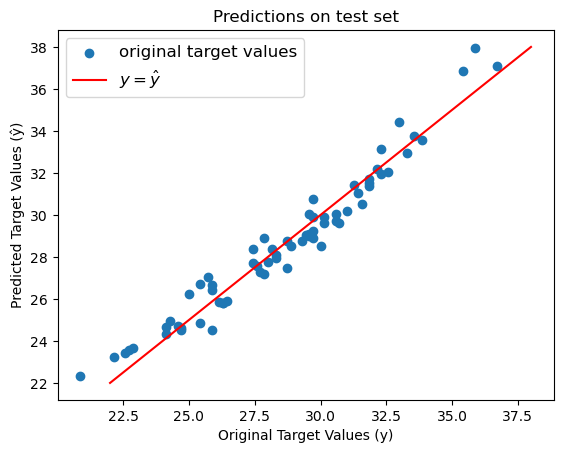

In [127]:
from matplotlib import pyplot as plt

# plot predicted against expected target values
plt.scatter(y_test, y_test_pred, label= 'original target values')
plt.plot([22, 38], [22, 38], 'r', label="$y=\\hat{y}$")
plt.xlabel("Original Target Values (y)")
plt.ylabel("Predicted Target Values (ŷ)")
plt.title("Predictions on test set")
_=plt.legend(fontsize = 12)

# Tuning the penalty weight λ to help control the balance between bias and variance can improve the model fitting



__How to Improve Model Fit__


**Task 1.6 [10 marks]**
Compare your result to the `Ridge` regression in `sklearn`. To do that
* create matrices `X1_train` and `X1_test` that do not have the column of ones, as sklearn does not require it.
* select `Ridge` regression model with correct paramaters
* fit the model to the training set
* calculate RMSE (using `sklearn` functions) on both training set and test set

Did you get the same result?

In [137]:
# create training and test feature matrices
X1_train = X_train[:, 1:]
X1_test = X_test[:, 1:]

# print the first few lines of the train matrix
print('Train:')
print(np.around(X1_train[:3,:],1))

# print the first few lines of the test matrix
print('\nTest:')
print(np.around(X1_test[:3,:],1))

Train:
[[-0.9 -1.4 -0.6 -1.6 -1.6 -1.   1.   3.3  2.8]
 [ 0.6  0.7 -0.2  0.5  0.6  0.7  0.6 -0.3 -0.2]
 [-1.1 -1.4 -0.3 -1.4 -0.7 -1.7 -0.1  1.9  1.7]]

Test:
[[ 0.3  1.   0.4 -0.5 -0.4 -1.  -1.6 -1.1 -1.3]
 [-0.5 -0.8 -1.1  0.5 -0.1  0.6  1.   0.4  0.6]
 [ 1.8  1.7  2.   1.5  2.4  0.8 -0.9 -1.  -1. ]]


In [139]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error as mse

# select model 
model = Ridge(alpha = 0.1)

# fit to the training set 
model.fit(X1_train, y_train)

# calculate RMSE on training set 
y_train_pred = model.predict(X1_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print('Training RMSE: ',round(rmse_train,2))

# calculate RMSE on test set - 2 marks (0 marks if not on test set)
y_test_pred = model.predict(X1_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('Test RMSE: ',round(rmse_test,2))

Training RMSE:  0.64
Test RMSE:  0.77


**Your answer:**
I got the same answer as training = 0.64 and test = 0.77 for the two different methods.


__Total Q1: 50 marks__


## Question 2
### Multi-class classification
<img src="images/HeartSegmentation.gif" width = "200" style="float: right;"> 

The goal of this question is to develop a machine learning algorithm to diagnose severity of heart-failure, by distinguishing between
* healthy patients (Label 0)
* patient with mild heart failure (Label 1) 
* patients with severe heart failure (Label 2)

Your task is to develop and evaluate non-linear multi-label classifier to predict the HF diagnosis from **EF** and **QRS** indices. 

The code below 
* loads and prints the data
* creates the feature matrix `X` and label vector `y`
* normalises the features using `StandardScaler`
* plots the normalised data

Run the code.

In [281]:
import pandas as pd

# Load csv file
df = pd.read_csv("heart_failure_data_complete.csv")  
data = df.to_numpy()

# Print number of samples
print('Number of samples: ',data.shape[0])

# print
df 

Number of samples:  120


,HF,EF,GLS,QRS
0,0,50.922280,-19.57,88
1,0,54.601227,-19.00,86
2,0,50.000000,-21.00,99
3,0,50.819672,-18.74,85
4,0,53.191489,-19.78,86
...,...,...,...,...
115,2,17.941176,-18.14,160
116,2,19.363395,-14.29,118
117,2,22.916667,-19.73,130
118,2,28.301887,-19.39,180


Features dims: (120, 2)  Labels dims: (120,)


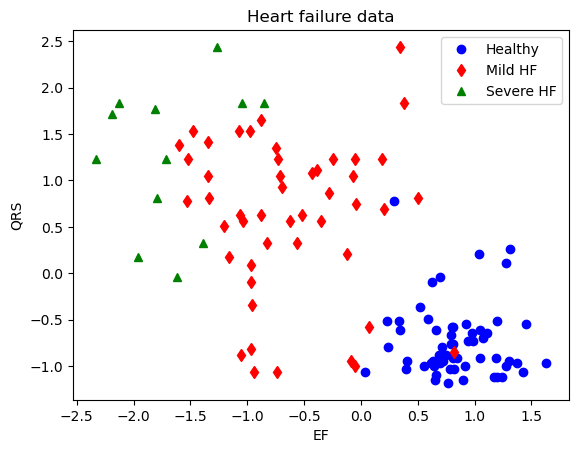

In [283]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Create and standardise the feature matrix, create label vector
X = StandardScaler().fit_transform(data[:,[1,3]])
y = data[:,0]
print('Features dims: {}  Labels dims: {}'.format(X.shape, y.shape))

# Plot the data
def plotData(X,y):
    plt.plot(X[y==0,0],X[y==0,1],'bo', label = 'Healthy')
    plt.plot(X[y==1,0],X[y==1,1],'rd', label = 'Mild HF')
    plt.plot(X[y==2,0],X[y==2,1],'g^', label = 'Severe HF')
    plt.legend()
    plt.title('Heart failure data')
    plt.xlabel('EF')
    plt.ylabel('QRS')
    
plotData(X,y)

__Task 2.1 [6 marks]__ 

To evaluate performance of a trained classifier, we need to split the data into training set and test set. Perform the following tasks:
* Use 20% of the data to create a test set. Stratify this test set by the labels.
* Plot training set and test set in the same figure with two subplots. Annotate the plot.

Training set size: (96, 2)
Test set size: (24, 2)


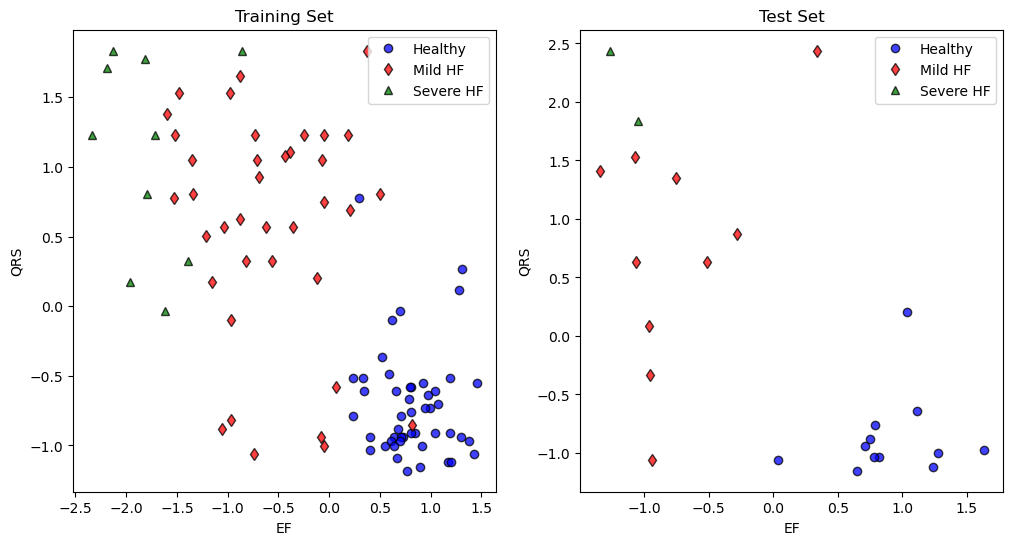

In [286]:
from sklearn.model_selection import train_test_split

# train test split
# Create feature matrix and label vector
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print('Training set size:', X_train.shape)
print('Test set size:', X_test.shape)

# plot 
def PlotData(X, y, title):
    # Plot class 0
    plt.plot(X[y == 0, 0], X[y == 0, 1], 'bo', alpha=0.75, markeredgecolor='k', label='Healthy')
    # Plot class 1
    plt.plot(X[y == 1, 0], X[y == 1, 1], 'rd', alpha=0.75, markeredgecolor='k', label='Mild HF')
    # Plot class 2
    plt.plot(X[y == 2, 0], X[y == 2, 1], 'g^', alpha=0.75, markeredgecolor='k', label='Severe HF')
    
    plt.title(title)
    plt.xlabel('EF')
    plt.ylabel('QRS')
    plt.legend()

# Create subplots for training and test sets
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Training set plot
plt.subplot(1, 2, 1)
PlotData(X_train, y_train, 'Training Set')

# Test set plot
plt.subplot(1, 2, 2)
PlotData(X_test, y_test, 'Test Set')

__Task 2.2 [7 marks]__ 

Train and evaluate a non-linear multinomial logistic regression classifier with polynomial feature transformation to predict HF class. Tune the regularisation parameter using `gridSearch` on the grid of values $[10^{-3}, 10^{-2},...,10^3]$ and polynomial degree $[1,2,3]$. Display the following results:
* Print cross-validated accuracy for the best model
* Print the best tuned parameters of the classifier
* Plot the decision boundary and the training data using the function `plotDecisionBoundary`

In [289]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create model
model = Pipeline([
    ('poly', PolynomialFeatures()),
    ('log_reg', LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000))
])

# Define parameter grid
param = {
    'poly__degree': [1, 2, 3], 
    'log_reg__C': [10**-3, 10**-2, 10**-1, 1, 10, 100, 1000] 
}

# Perform grid search
g = GridSearchCV(model, param, cv=5, scoring='accuracy')
g.fit(X_train, y_train)
print('Best cross-validated accuracy:', round(g.best_score_,2))

Best cross-validated accuracy: 0.93


In [291]:
# print hyperparameters
print('Selected parameter 1 (degree):', g.best_params_['poly__degree']) 
print('Selected parameter 2 (C):', g.best_params_['log_reg__C']) 

Selected parameter 1 (degree): 3
Selected parameter 2 (C): 1


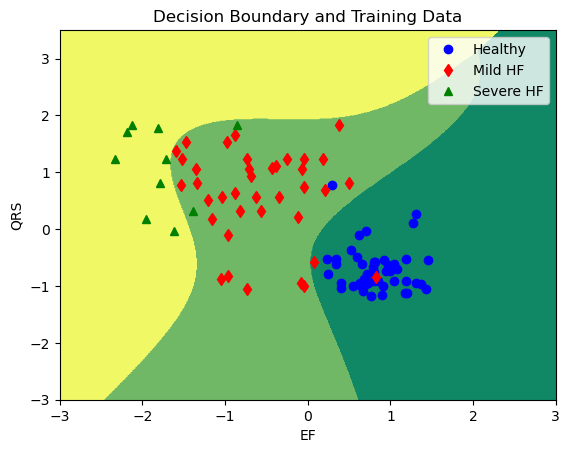

In [293]:
def plotDecisionBoundary(model,X,y):
    # Create an array that represents the sampled feature space
    xx = np.linspace(-3, 3, 500) 
    yy = np.linspace(-3, 3.5, 500).T 
    xx, yy = np.meshgrid(xx, yy) 
    Feature_space = np.c_[xx.ravel(), yy.ravel()] 
    
    # predict labels
    y_pred = model.predict(Feature_space).reshape(xx.shape)

    # plot predictions
    plt.contourf(xx,yy,y_pred, cmap = 'summer')
    plotData(X, y)

    plt.xlabel('EF')
    plt.ylabel('QRS')
    plt.title('Decision Boundary and Training Data')
    plt.show()

# plot the fitted model
plotDecisionBoundary(g.best_estimator_, X_train, y_train)

**Task 2.3: [12 marks]** Evaluate your trained classifier:
* Calculate and print cross-validated recalls for each class, and also average recall over all classes.
* Calculate and plot the confusion matrix
* Interpret the results. Is there a problem with the classifier? Write your answer in the cell below.

In [296]:
from sklearn.metrics import recall_score, confusion_matrix
from sklearn.model_selection import cross_val_predict

# Calculate recalls for each class
y_pred = cross_val_predict(g.best_estimator_,X_train,y_train,cv = 5)
recalls = recall_score(y_train, y_pred, average=None)
print('Recalls: ', np.around(recalls,3))

# Calculate average recall over all classes
mean_recall_macro = recall_score(y_train, y_pred, average='macro')
print('Average recall: ', np.around(mean_recall_macro,3))

Recalls:  [0.979 0.895 0.8  ]
Average recall:  0.891


Confusion Matrix:
 [[47  1  0]
 [ 2 34  2]
 [ 0  2  8]]


Text(0, 0.5, 'True labels')

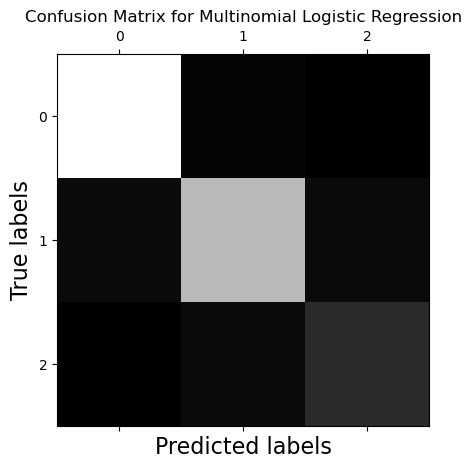

In [298]:
# calculate confusion matrix 
cm = confusion_matrix(y_train, y_pred)

# print confusion matrix
print('Confusion Matrix:\n', cm)

# plot confusion matrix 
plt.matshow(cm, cmap='gray')
plt.title('Confusion Matrix for Multinomial Logistic Regression')
plt.xlabel('Predicted labels', fontsize = 16)
plt.ylabel('True labels', fontsize = 16)


**Intepret the performance results:**

High Recall for Healthy Cases: Class 0 (Healthy) has the highest recall at 0.979, indicating the classifier effectively identifies healthy cases with minimal misclassification.

Moderate Recall for Mild HF: Class 1 (Mild HF) has a recall of 0.895, which is slightly lower but still reflects good sensitivity. However, there is a small amount of misclassification between Mild and Severe HF, as seen with two Mild HF samples classified as Severe HF.

Lower Recall for Severe HF: Class 2 (Severe HF) has the lowest recall at 0.8, showing that the classifier struggles more to accurately identify severe cases, with two instances being misclassified as Mild HF.

Average Recall and Class Imbalance: The average recall of 0.891 is reasonable but suggests some imbalance in the performance of the classifier, particularly with Severe HF. Lower recall in this class could be due to overlapping features or not enough training samples for more precise classification.

Therefore we can say the classifier performs less accurately for Severe HF cases, which could pose a problem in real-world scenarios where identifying severe cases is crucial. This discrepancy may suggest the model is biased towards the more easily identifiable classes additionally misclassifications between Mild and Severe HF suggest that the classifier finds it challenging to distinguish between these classes, likely due to feature overlap. 



**Task 2.4 [10 marks]**

Propose an amendment of your support vector classifier to address the problem that you identified in **Task 2.3**. Then perform these steps:
* tune the amended classifier
* print out best cross-validated accuracy
* calculate the recalls for each class
* calculate average recall

Was the problem resolved? Comment on the result.

*Note 1: the results will depend on the random train test split, so the answer might be different for different runs*

*Note 2: This is an open-ended question, you should not e-mail to ask what you can propose*

Best cross-validated accuracy: 0.92
Recalls:  [0.98 0.87 0.8 ]
Average recall:  0.88


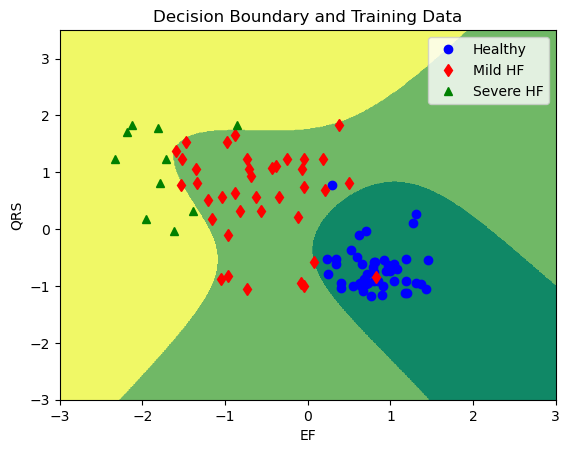

In [314]:
# Create and train a new improved model (Logistic Regression with class weights balanced and a penalty)
model2 = Pipeline([
    ('poly', PolynomialFeatures()),  
    ('log_reg', LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, class_weight='balanced', penalty='l2'))
])


# Define parameter grid for tuning

param_grid = {
    'poly__degree': [1, 2, 3],                  
    'log_reg__C': [10**-3, 10**-2, 10**-1, 1, 10, 100, 1000]  
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model2, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

print('Best cross-validated accuracy:', round(grid_search.best_score_,2)) 

# Calculate recalls for each class
y_pred = cross_val_predict(grid_search.best_estimator_, X_train, y_train, cv=5)
recalls_tuned = recall_score(y_train, y_pred, average=None)
print('Recalls: ', np.around(recalls_tuned,2))

# Calculate average recall
mean_recall_macro_tuned = recall_score(y_train, y_pred, average='macro')
print('Average recall: ', np.around(mean_recall_macro_tuned,2))

# Plot the classifier 
plotDecisionBoundary(grid_search.best_estimator_, X_train,y_train) 

**Explain how you improved the classifier and how the performance was improved:**
To address the slight imbalance in recall for the "Mild HF" class, I applied an L2 penalty to the logistic regression model. This penalty helps to reduce overfitting and promote more generalized decision boundaries. I also used class_weight='balanced' to ensure the model gives importance to each class, especially the underrepresented ones. This adjustment is improves the model's sensitivity to minority classes. 

The performance was improved as the amended classifier shows a slight decrease in cross-validated accuracy (0.92 vs. 0.93), but this is offset by improvements in recall values, such as, the recall for the "Healthy" class improved slightly, while the "Mild HF" recall decreased to 0.87. The recall for the "Severe HF" class remained consistent at 0.8. The average recall of 0.88 reflects a more equitable performance across classes, reducing the risk of class-specific biases making it a more reliable model.


__Task 2.5 [15 marks]__

Select your prefered of the two classifiers that you implemented in 2.3 and/or 2.4.
* Evaluate your selected classifier **on the test set**. Include accuracy, recalls for each class and average recall. Print the results. 
* Plot the decision boundary and the test data
* Discuss the performance of your final model. Did the model generalise well to test data? Can you reason why?

Accuracy:  0.88
Recalls:  [0.92 0.9  1.  ]
Average recall:  0.94


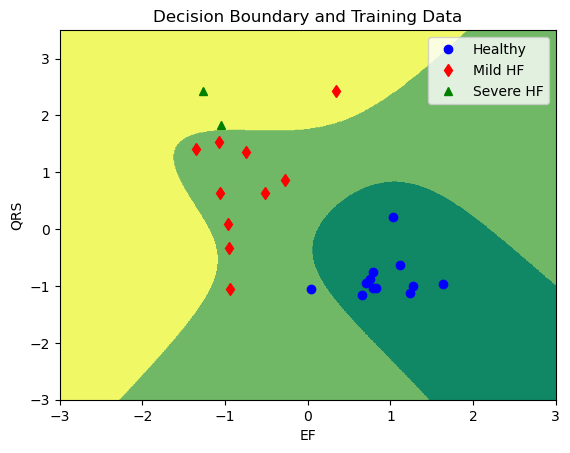

In [326]:
# Amended classification
from sklearn.model_selection import cross_val_score
y_test_pred = grid_search.best_estimator_.predict(X_test)
# accuracy
cross_val_accuracy = cross_val_score(grid_search.best_estimator_, X_test, y_test, cv=2, scoring='accuracy')
print('Accuracy: ', round(cross_val_accuracy.mean(),2))

# recalls for all classes
recalls = recall_score(y_test, y_test_pred, average=None)
print('Recalls: ', np.around(recalls,2))

# average recall over all classes
average_recall = recall_score(y_test,y_test_pred,average='macro')
print('Average recall: ', np.around(average_recall,2))

# plot decision boundary
plotDecisionBoundary(grid_search.best_estimator_, X_test, y_test)

**Discuss performance on test set:** 
The performance numbers for the final model on the test data indicate a really good predictive capability. 
The accuracy is a value of 0.88: This means that the model correctly classified 88% of the test samples, which is a high result for a multi-class classification problem.
The recall values are [0.92, 0.90, 1.0]: The recalls for each class show that the model is highly effective at identifying samples across all heart failure classes:
For Healthy (Class 0): A recall of 0.92 indicates that 92% of the actual healthy samples were correctly identified.
For Mild HF (Class 1): A recall of 0.90 means that 90% of the mild heart failure cases were detected.
For Severe HF (Class 2): A perfect recall of 1.0 suggests that all severe heart failure cases were correctly classified.
The high average recall value of 0.94 demonstrates that the model maintains strong performance across all classes, suggesting it effectively balances precision and recall without being biased toward any single class.
The model appears to generalize well to the test data. This is evident from the close alignment between the training and test performance numbers.

**Total Q2: 50 marks**
### Total marks: 100